# Description: External Economic Factors Impact on SPY ETF (S&P 500 Index)
We have performed individual economic analyses to understand the relationship between each economic factor and the S&P 500 ETF price.

To obtain an accurate analysis, we conducted a rate of change, scatter plot, regression, and correlation analysis.

1.   Combined Data
2.   Comparing GDP VS SPY Close Price
3.   Comparing Federal Funds VS SPY Close Price
4.   Comparing Unemployment Rate VS SPY Close Price
5.   Comparing Consumer Price Index(CPI) VS SPY Close Price
6.   Comparing Producer Price Index(PPI) VS SPY Close Price





## 1. Combined Data

In [1]:
pip install fredapi

In [2]:
API_KEY ='f09e9ac754a634eac69fe9d992b3591c'

In [3]:
import pandas as pd
import yfinance as yf
from fredapi import Fred

# FRED API and Economic Data
fred = Fred(API_KEY)
series_ids = {
    'GDP': 'GDP',
    'Federal Funds': 'FEDFUNDS',
    'Unemployment Rate': 'UNRATE',
    'Consumer Price Index (CPI)': 'CPIAUCSL',
    'Producer Price Index (PPI)': 'PPIACO'
}
start_date = '2018-07-01'
end_date = '2023-07-01'

data = {}
for series_name, series_id in series_ids.items():
    data[series_name] = fred.get_series(series_id, observation_start=start_date, observation_end=end_date)

economic_data = pd.DataFrame(data)

# Ensure the index is a datetime index
economic_data.index = pd.to_datetime(economic_data.index)

# SPY Data
spy_data = yf.download('SPY', start=start_date, end=end_date)

#'Close' price of SPY
spy_data = spy_data[['Close']]

# Combine the economic data and SPY data
combined_data = economic_data.join(spy_data, how='outer')

# combined_data.dropna
combined_data.dropna(inplace=True)

# Print the combined dataframe
combined_data


[*********************100%%**********************]  1 of 1 completed


,GDP,Federal Funds,Unemployment Rate,Consumer Price Index (CPI),Producer Price Index (PPI),Close
2018-10-01,20917.867,2.19,3.8,252.772,204.600,291.730011
2019-04-01,21384.775,2.42,3.6,255.211,202.100,285.829987
2019-07-01,21694.282,2.40,3.7,255.685,200.700,295.660004
2019-10-01,21902.390,1.83,3.6,257.244,198.600,293.239990
2020-04-01,19913.143,0.05,14.7,256.092,185.500,246.149994
2020-07-01,21647.640,0.09,10.2,258.278,193.000,310.519989
2020-10-01,22024.502,0.09,6.9,260.286,196.500,337.040009
2021-04-01,23292.362,0.07,6.1,266.670,217.900,400.609985
2021-07-01,23828.973,0.10,5.4,271.764,231.850,430.429993
2021-10-01,24654.603,0.08,4.5,276.522,240.465,434.239990


## 2. Comparing GDP VS SPY Close Price

In [4]:
import pandas as pd
import yfinance as yf
from fredapi import Fred

# FRED API and Economic Data
fred = Fred(API_KEY)  # Replace API_KEY with your actual FRED API key
series_ids = {
    'GDP': 'GDP',
    'Federal Funds': 'FEDFUNDS',
    'Unemployment Rate': 'UNRATE',
    'Consumer Price Index (CPI)': 'CPIAUCSL',
    'Producer Price Index (PPI)': 'PPIACO'
}
start_date = '2018-07-01'
end_date = '2023-07-01'

# SPY Data
spy_data = yf.download('SPY', start=start_date, end=end_date)['Close']

# Create separate dataframes for each economic indicator with the SPY close price
dfs = {}
for series_name, series_id in series_ids.items():
    series_data = fred.get_series(series_id, observation_start=start_date, observation_end=end_date)
    df = pd.DataFrame({series_name: series_data, 'Close': spy_data})
    df.dropna(inplace=True)  # Drop rows where any of the two columns is NaN
    dfs[series_name] = df


# Print the GDP
dfs['GDP']


[*********************100%%**********************]  1 of 1 completed


,GDP,Close
2018-10-01,20917.867,291.730011
2019-04-01,21384.775,285.829987
2019-07-01,21694.282,295.660004
2019-10-01,21902.390,293.239990
2020-04-01,19913.143,246.149994
2020-07-01,21647.640,310.519989
2020-10-01,22024.502,337.040009
2021-04-01,23292.362,400.609985
2021-07-01,23828.973,430.429993
2021-10-01,24654.603,434.239990


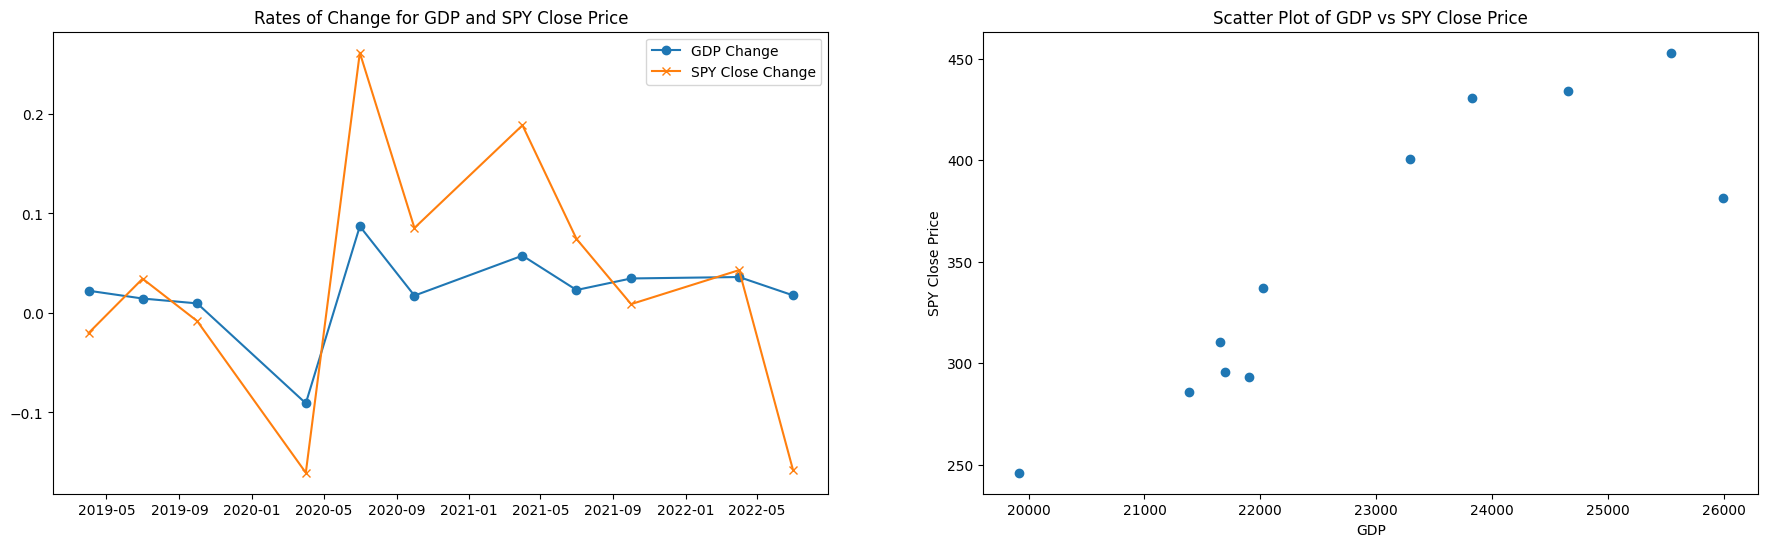

Correlation Coefficient (Original): 0.8833027209422517
Correlation Coefficient (Change): 0.786599480856869
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     31.95
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           0.000313
Time:                        22:32:00   Log-Likelihood:                -53.647
No. Observations:                  11   AIC:                             111.3
Df Residuals:                       9   BIC:                             112.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

combined_data_gdp = dfs['GDP']

# Calculate the rates of change
combined_data_gdp['GDP Change'] = combined_data_gdp['GDP'].pct_change()
combined_data_gdp['Close Change'] = combined_data_gdp['Close'].pct_change()

# Drop the initial row with NaN
combined_data_gdp = combined_data_gdp.dropna()

# Visualization
# Line plot for the rates of change
plt.figure(figsize=(22, 6))
plt.subplot(1, 2, 1)
plt.plot(combined_data_gdp.index, combined_data_gdp['GDP Change'], label='GDP Change', marker='o')
plt.plot(combined_data_gdp.index, combined_data_gdp['Close Change'], label='SPY Close Change', marker='x')
plt.legend()
plt.title('Rates of Change for GDP and SPY Close Price')

# Scatter plot for the original values
plt.subplot(1, 2, 2)
plt.scatter(combined_data_gdp['GDP'], combined_data_gdp['Close'])
plt.xlabel('GDP')
plt.ylabel('SPY Close Price')
plt.title('Scatter Plot of GDP vs SPY Close Price')
plt.show()

# Correlation Analysis
correlation_original = combined_data_gdp['GDP'].corr(combined_data_gdp['Close'])
correlation_change = combined_data_gdp['GDP Change'].corr(combined_data_gdp['Close Change'])
print(f"Correlation Coefficient (Original): {correlation_original}")
print(f"Correlation Coefficient (Change): {correlation_change}")

# Regression Analysis for the original values
X = combined_data_gdp['GDP']  # Independent variable
Y = combined_data_gdp['Close']  # Dependent variable
X = sm.add_constant(X)  # Add a constant to the independent variable
model = sm.OLS(Y, X).fit()  # Fit the regression model
print(model.summary())


## 3. Comparing Federal Funds VS SPY Close Price

In [6]:
dfs['Federal Funds']

,Federal Funds,Close
2018-08-01,1.91,280.859985
2018-10-01,2.19,291.730011
2018-11-01,2.20,273.510010
2019-02-01,2.40,270.059998
2019-03-01,2.41,280.420013
2019-04-01,2.42,285.829987
2019-05-01,2.39,291.809998
2019-07-01,2.40,295.660004
2019-08-01,2.13,294.839996
2019-10-01,1.83,293.239990


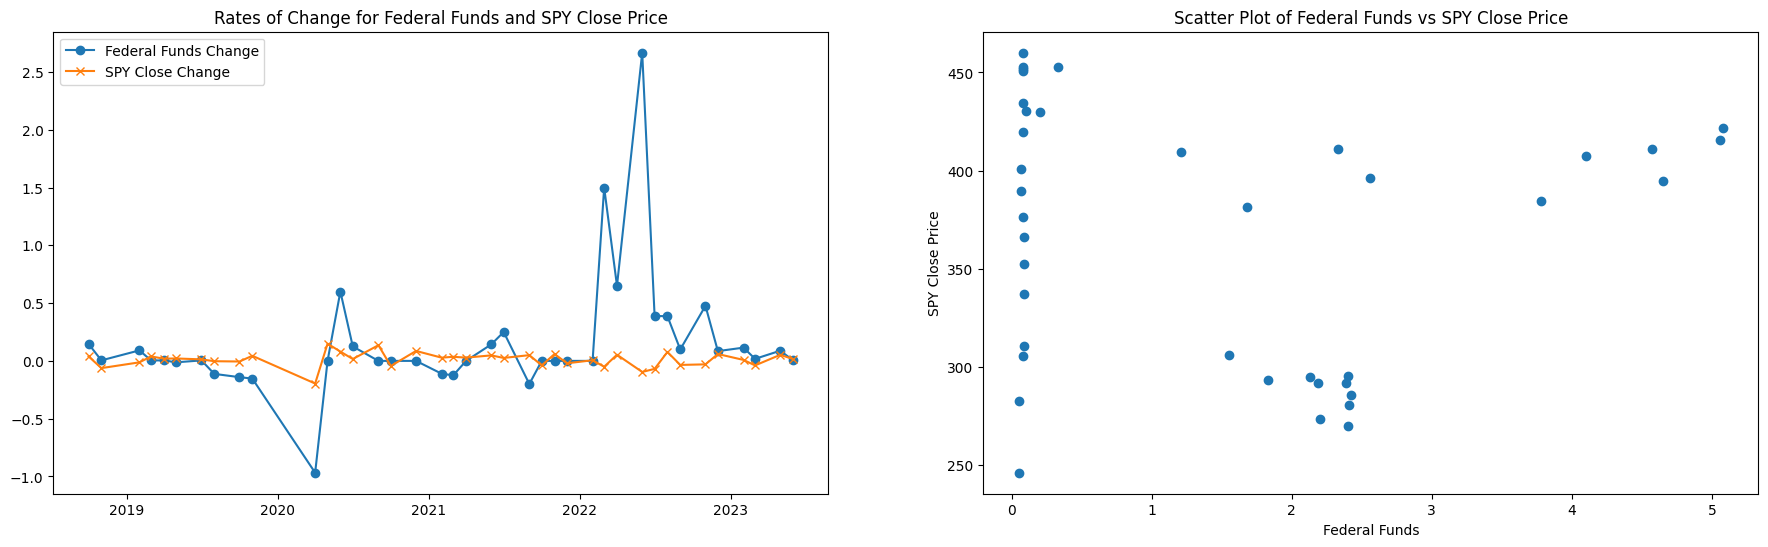

Correlation Coefficient (Original): -0.06605368511604187
Correlation Coefficient (Change): -0.11115136730964077
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.1621
Date:                Wed, 29 Nov 2023   Prob (F-statistic):              0.690
Time:                        22:32:03   Log-Likelihood:                -217.73
No. Observations:                  39   AIC:                             439.5
Df Residuals:                      37   BIC:                             442.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [7]:
# Use the DataFrame corresponding to Federal Funds
combined_data_ff = dfs['Federal Funds']

# Calculate the rates of change
combined_data_ff['Federal Funds Change'] = combined_data_ff['Federal Funds'].pct_change()
combined_data_ff['Close Change'] = combined_data_ff['Close'].pct_change()

# Drop the initial row with NaN
combined_data_ff = combined_data_ff.dropna()

# Visualization
# Line plot for the rates of change
plt.figure(figsize=(22, 6))
plt.subplot(1, 2, 1)
plt.plot(combined_data_ff.index, combined_data_ff['Federal Funds Change'], label='Federal Funds Change', marker='o')
plt.plot(combined_data_ff.index, combined_data_ff['Close Change'], label='SPY Close Change', marker='x')
plt.legend()
plt.title('Rates of Change for Federal Funds and SPY Close Price')

# Scatter plot for the original values
plt.subplot(1, 2, 2)
plt.scatter(combined_data_ff['Federal Funds'], combined_data_ff['Close'])
plt.xlabel('Federal Funds')
plt.ylabel('SPY Close Price')
plt.title('Scatter Plot of Federal Funds vs SPY Close Price')
plt.show()

# Correlation Analysis
correlation_original = combined_data_ff['Federal Funds'].corr(combined_data_ff['Close'])
correlation_change = combined_data_ff['Federal Funds Change'].corr(combined_data_ff['Close Change'])
print(f"Correlation Coefficient (Original): {correlation_original}")
print(f"Correlation Coefficient (Change): {correlation_change}")

# Regression Analysis for the original values
X = combined_data_ff['Federal Funds']  # Independent variable
Y = combined_data_ff['Close']  # Dependent variable
X = sm.add_constant(X)  # Add a constant to the independent variable
model = sm.OLS(Y, X).fit()  # Fit the regression model
print(model.summary())


## 4. Comparing Unemployment Rate VS SPY Close Price

In [8]:
dfs['Unemployment Rate']

,Unemployment Rate,Close
2018-08-01,3.8,280.859985
2018-10-01,3.8,291.730011
2018-11-01,3.8,273.510010
2019-02-01,3.8,270.059998
2019-03-01,3.8,280.420013
2019-04-01,3.6,285.829987
2019-05-01,3.7,291.809998
2019-07-01,3.7,295.660004
2019-08-01,3.7,294.839996
2019-10-01,3.6,293.239990


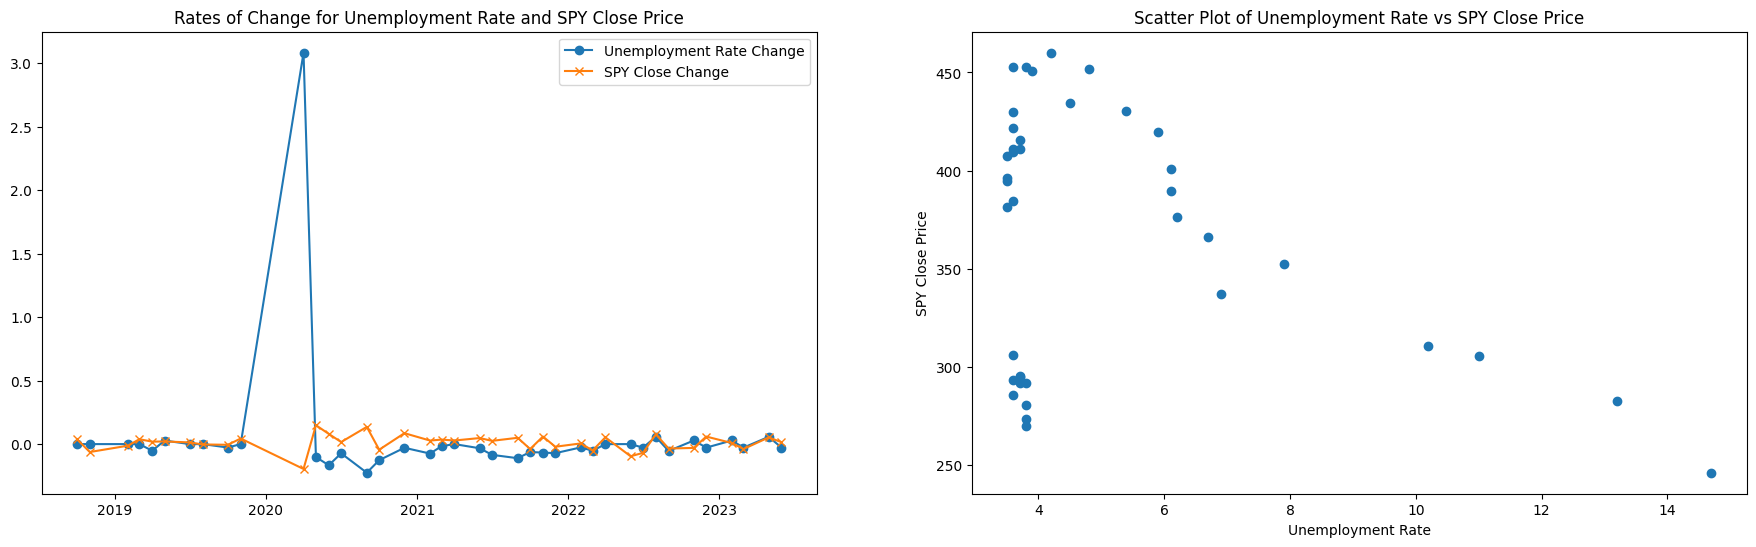

Correlation Coefficient (Original): -0.3664369193199459
Correlation Coefficient (Change): -0.5721772173154895
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     5.739
Date:                Wed, 29 Nov 2023   Prob (F-statistic):             0.0218
Time:                        22:32:06   Log-Likelihood:                -215.01
No. Observations:                  39   AIC:                             434.0
Df Residuals:                      37   BIC:                             437.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [9]:
# Use the DataFrame corresponding to Unemployment Rate
combined_data_ur = dfs['Unemployment Rate']

# Calculate the rates of change
combined_data_ur['Unemployment Rate Change'] = combined_data_ur['Unemployment Rate'].pct_change()
combined_data_ur['Close Change'] = combined_data_ur['Close'].pct_change()

# Drop the initial row with NaN
combined_data_ur = combined_data_ur.dropna()

# Visualization
# Line plot for the rates of change
plt.figure(figsize=(22, 6))
plt.subplot(1, 2, 1)
plt.plot(combined_data_ur.index, combined_data_ur['Unemployment Rate Change'], label='Unemployment Rate Change', marker='o')
plt.plot(combined_data_ur.index, combined_data_ur['Close Change'], label='SPY Close Change', marker='x')
plt.legend()
plt.title('Rates of Change for Unemployment Rate and SPY Close Price')

# Scatter plot for the original values
plt.subplot(1, 2, 2)
plt.scatter(combined_data_ur['Unemployment Rate'], combined_data_ur['Close'])
plt.xlabel('Unemployment Rate')
plt.ylabel('SPY Close Price')
plt.title('Scatter Plot of Unemployment Rate vs SPY Close Price')
plt.show()

# Correlation Analysis
correlation_original = combined_data_ur['Unemployment Rate'].corr(combined_data_ur['Close'])
correlation_change = combined_data_ur['Unemployment Rate Change'].corr(combined_data_ur['Close Change'])
print(f"Correlation Coefficient (Original): {correlation_original}")
print(f"Correlation Coefficient (Change): {correlation_change}")

# Regression Analysis for the original values
X = combined_data_ur['Unemployment Rate']  # Independent variable
Y = combined_data_ur['Close']  # Dependent variable
X = sm.add_constant(X)  # Add a constant to the independent variable
model = sm.OLS(Y, X).fit()  # Fit the regression model
print(model.summary())


## 5. Comparing Consumer Price Index(CPI) VS SPY Close Price

In [10]:
dfs['Consumer Price Index (CPI)']

,Consumer Price Index (CPI),Close
2018-08-01,251.663,280.859985
2018-10-01,252.772,291.730011
2018-11-01,252.594,273.510010
2019-02-01,253.322,270.059998
2019-03-01,254.202,280.420013
2019-04-01,255.211,285.829987
2019-05-01,255.290,291.809998
2019-07-01,255.685,295.660004
2019-08-01,256.059,294.839996
2019-10-01,257.244,293.239990


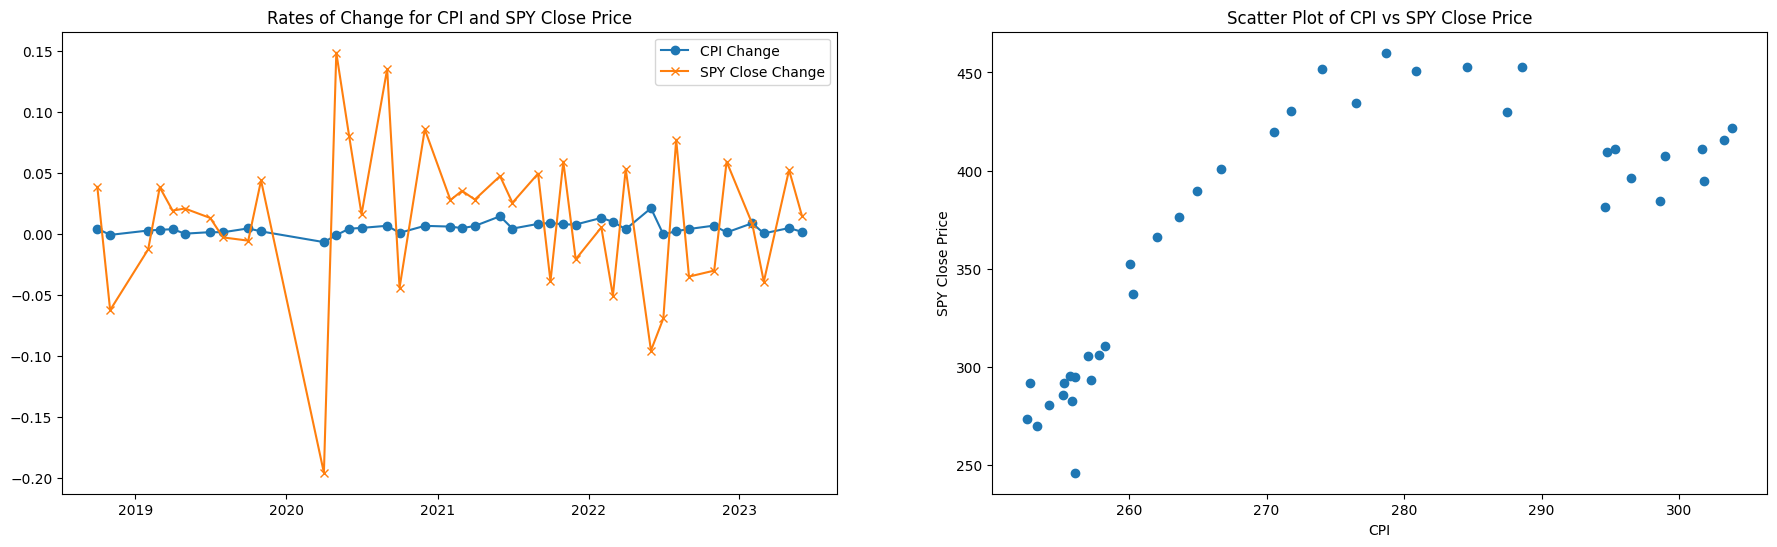

Correlation Coefficient (Original): 0.7524409158011143
Correlation Coefficient (Change): 0.07933119130996177
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     48.29
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           3.32e-08
Time:                        22:32:07   Log-Likelihood:                -201.53
No. Observations:                  39   AIC:                             407.1
Df Residuals:                      37   BIC:                             410.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
------

In [11]:
# Use the DataFrame corresponding to CPI
combined_data_cpi = dfs['Consumer Price Index (CPI)']

# Calculate the rates of change
combined_data_cpi['CPI Change'] = combined_data_cpi['Consumer Price Index (CPI)'].pct_change()
combined_data_cpi['Close Change'] = combined_data_cpi['Close'].pct_change()

# Drop the initial row with NaN
combined_data_cpi = combined_data_cpi.dropna()

# Visualization
# Line plot for the rates of change
plt.figure(figsize=(22, 6))
plt.subplot(1, 2, 1)
plt.plot(combined_data_cpi.index, combined_data_cpi['CPI Change'], label='CPI Change', marker='o')
plt.plot(combined_data_cpi.index, combined_data_cpi['Close Change'], label='SPY Close Change', marker='x')
plt.legend()
plt.title('Rates of Change for CPI and SPY Close Price')

# Scatter plot for the original values
plt.subplot(1, 2, 2)
plt.scatter(combined_data_cpi['Consumer Price Index (CPI)'], combined_data_cpi['Close'])
plt.xlabel('CPI')
plt.ylabel('SPY Close Price')
plt.title('Scatter Plot of CPI vs SPY Close Price')
plt.show()

# Correlation Analysis
correlation_original = combined_data_cpi['Consumer Price Index (CPI)'].corr(combined_data_cpi['Close'])
correlation_change = combined_data_cpi['CPI Change'].corr(combined_data_cpi['Close Change'])
print(f"Correlation Coefficient (Original): {correlation_original}")
print(f"Correlation Coefficient (Change): {correlation_change}")

# Regression Analysis for the original values
X = combined_data_cpi['Consumer Price Index (CPI)']  # Independent variable
Y = combined_data_cpi['Close']  # Dependent variable
X = sm.add_constant(X)  # Add a constant to the independent variable
model = sm.OLS(Y, X).fit()  # Fit the regression model
print(model.summary())


## 6. Comparing Producer Price Index(PPI) VS SPY Close Price

In [12]:
dfs['Producer Price Index (PPI)']

,Producer Price Index (PPI),Close
2018-08-01,203.400,280.859985
2018-10-01,204.600,291.730011
2018-11-01,202.300,273.510010
2019-02-01,199.200,270.059998
2019-03-01,200.800,280.420013
2019-04-01,202.100,285.829987
2019-05-01,201.700,291.809998
2019-07-01,200.700,295.660004
2019-08-01,199.200,294.839996
2019-10-01,198.600,293.239990


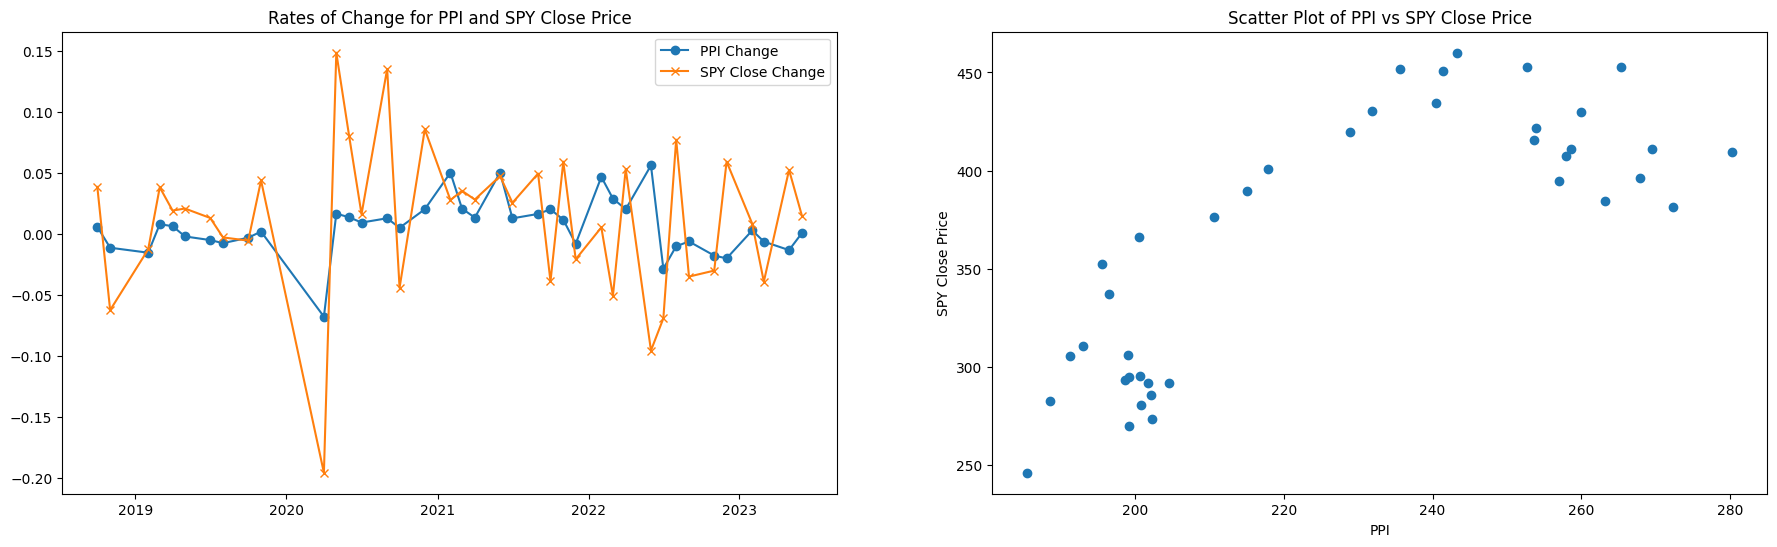

Correlation Coefficient (Original): 0.7965859283586177
Correlation Coefficient (Change): 0.36449593040773737
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     64.24
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.32e-09
Time:                        22:32:09   Log-Likelihood:                -198.19
No. Observations:                  39   AIC:                             400.4
Df Residuals:                      37   BIC:                             403.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
------

In [13]:
# Use the DataFrame corresponding to PPI
combined_data_ppi = dfs['Producer Price Index (PPI)']
# Calculate the rates of change
combined_data_ppi['PPI Change'] = combined_data_ppi['Producer Price Index (PPI)'].pct_change()
combined_data_ppi['Close Change'] = combined_data_ppi['Close'].pct_change()

# Drop the initial row with NaN
combined_data_ppi = combined_data_ppi.dropna()

# Visualization
# Line plot for the rates of change
plt.figure(figsize=(22, 6))
plt.subplot(1, 2, 1)
plt.plot(combined_data_ppi.index, combined_data_ppi['PPI Change'], label='PPI Change', marker='o')
plt.plot(combined_data_ppi.index, combined_data_ppi['Close Change'], label='SPY Close Change', marker='x')
plt.legend()
plt.title('Rates of Change for PPI and SPY Close Price')

# Scatter plot for the original values
plt.subplot(1, 2, 2)
plt.scatter(combined_data_ppi['Producer Price Index (PPI)'], combined_data_ppi['Close'])
plt.xlabel('PPI')
plt.ylabel('SPY Close Price')
plt.title('Scatter Plot of PPI vs SPY Close Price')
plt.show()

# Correlation Analysis
correlation_original = combined_data_ppi['Producer Price Index (PPI)'].corr(combined_data_ppi['Close'])
correlation_change = combined_data_ppi['PPI Change'].corr(combined_data_ppi['Close Change'])
print(f"Correlation Coefficient (Original): {correlation_original}")
print(f"Correlation Coefficient (Change): {correlation_change}")

# Regression Analysis for the original values
X = combined_data_ppi['Producer Price Index (PPI)']  # Independent variable
Y = combined_data_ppi['Close']  # Dependent variable
X = sm.add_constant(X)  # Add a constant to the independent variable
model = sm.OLS(Y, X).fit()  # Fit the regression model
print(model.summary())


## Reference:
SPY ETF Price
https://finance.yahoo.com/quote/SPY?p=SPY&.tsrc=fin-srch